## **EX 1 - Learning the data :)**

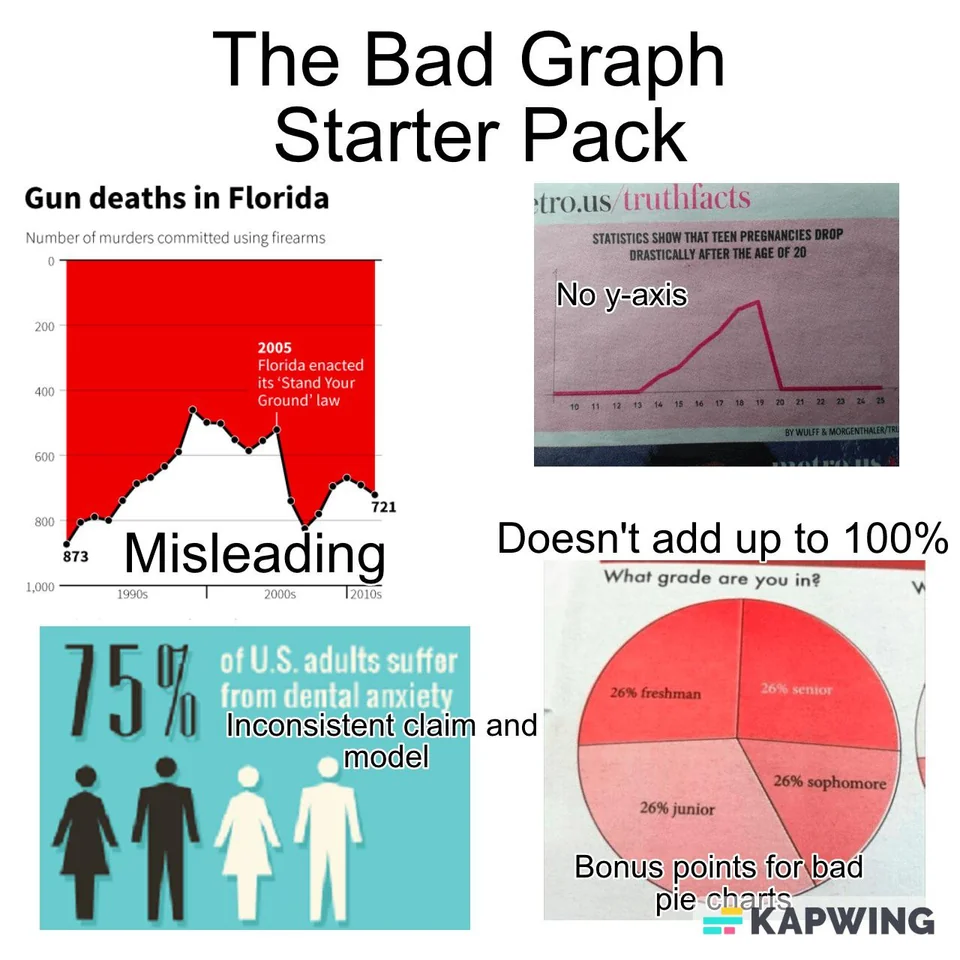   
Link: https://www.reddit.com/r/mathmemes/comments/12ec0u9/

### These are important imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from random import choice
from sklearn.linear_model import LinearRegression

In [2]:
sb.set(color_codes=True, rc={'figure.figsize': (10, 100)})

### Reading the CSV file:

In [3]:
data_frame = pd.read_csv("./startup_dataset.csv")

### Data information and examples of our data:

In [4]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 738 entries, 0 to 737
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   738 non-null    object 
 1   state_code           738 non-null    object 
 2   latitude             738 non-null    float64
 3   longitude            738 non-null    float64
 4   zip_code             738 non-null    object 
 5   city                 738 non-null    object 
 6   name                 738 non-null    object 
 7   foundation_date      738 non-null    object 
 8   first_funding_date   738 non-null    object 
 9   last_funding_date    738 non-null    object 
 10  first_funding_age    738 non-null    float64
 11  last_funding_age     738 non-null    float64
 12  first_milestone_age  609 non-null    float64
 13  last_milestone_age   609 non-null    float64
 14  connections          738 non-null    int64  
 15  funding_rounds       738 non-null    int

In [5]:
data_frame

,id,state_code,latitude,longitude,zip_code,city,name,foundation_date,first_funding_date,last_funding_date,...,is_biotech,is_consulting,is_othercategory,roundA,roundB,roundC,roundD,avg_group_size,in_Top500,Target
0,c:6669,CA,42.358880,-71.056820,92101,San Diego,Bandsintown,01/01/2007,04/01/2009,01/01/2010,...,0,0,1,0,0,0,0,1.0000,0,acquired
1,c:16283,CA,37.238916,-121.973718,95032,Los Gatos,TriCipher,01/01/2000,2/14/2005,12/28/2009,...,0,0,0,0,1,1,1,4.7500,1,acquired
2,c:65620,CA,32.901049,-117.192656,92121,San Diego,Plixi,3/18/2009,3/30/2010,3/30/2010,...,0,0,0,1,0,0,0,4.0000,1,acquired
3,c:42668,CA,37.320309,-122.050040,95014,Cupertino,Solidcore Systems,01/01/2002,2/17/2005,4/25/2007,...,0,0,0,0,1,1,1,3.3333,1,acquired
4,c:65806,CA,37.779281,-122.419236,94105,San Francisco,Inhale Digital,08/01/2010,08/01/2010,04/01/2012,...,0,0,0,0,0,0,0,1.0000,1,closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733,c:5988,CA,37.536402,-122.325129,94403,San Mateo,B-hive Networks,01/01/2005,8/25/2006,8/25/2006,...,0,0,0,1,0,0,0,2.0000,1,acquired
734,c:34549,NY,40.650104,-73.949582,11211,Brooklyn,Hot Potato,01/01/2009,11/25/2009,11/25/2009,...,0,0,1,1,0,0,0,16.0000,1,acquired
735,c:19538,WA,47.625740,-122.358162,98119,Seattle,Kashless,09/01/2008,10/29/2008,02/04/2011,...,0,0,0,1,0,0,0,1.0000,1,closed
736,c:29605,PA,40.245664,-74.845997,19067,Yardley,Three Screen Games,01/01/2009,10/07/2009,10/07/2009,...,0,0,0,0,0,0,0,1.0000,1,closed


In [6]:
data_frame.describe(include='all')

,id,state_code,latitude,longitude,zip_code,city,name,foundation_date,first_funding_date,last_funding_date,...,is_biotech,is_consulting,is_othercategory,roundA,roundB,roundC,roundD,avg_group_size,in_Top500,Target
count,738,738,738.000000,738.000000,738,738,738,738,738,738,...,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738
unique,738,32,NaN,NaN,327,194,738,186,487,578,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,c:6669,CA,NaN,NaN,94107,San Francisco,Bandsintown,01/01/2002,01/01/2007,01/01/2008,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,acquired
freq,1,376,NaN,NaN,24,100,1,47,14,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,470
mean,NaN,NaN,38.558655,-102.814267,NaN,NaN,NaN,NaN,NaN,NaN,...,0.039295,0.002710,0.310298,0.513550,0.397019,0.231707,0.105691,2.795865,0.814363,NaN
std,NaN,NaN,3.669119,22.456789,NaN,NaN,NaN,NaN,NaN,NaN,...,0.194429,0.052023,0.462929,0.500155,0.489612,0.422209,0.307650,1.828125,0.389077,NaN
min,NaN,NaN,26.052461,-122.756956,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,NaN
25%,NaN,NaN,37.391580,-122.192169,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000,NaN
50%,NaN,NaN,37.779281,-118.287233,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.450000,1.000000,NaN
75%,NaN,NaN,40.730646,-76.850588,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.666700,1.000000,NaN


In [7]:
data_frame.describe(include='all', datetime_is_numeric=True)

,id,state_code,latitude,longitude,zip_code,city,name,foundation_date,first_funding_date,last_funding_date,...,is_biotech,is_consulting,is_othercategory,roundA,roundB,roundC,roundD,avg_group_size,in_Top500,Target
count,738,738,738.000000,738.000000,738,738,738,738,738,738,...,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738
unique,738,32,NaN,NaN,327,194,738,186,487,578,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,c:6669,CA,NaN,NaN,94107,San Francisco,Bandsintown,01/01/2002,01/01/2007,01/01/2008,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,acquired
freq,1,376,NaN,NaN,24,100,1,47,14,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,470
mean,NaN,NaN,38.558655,-102.814267,NaN,NaN,NaN,NaN,NaN,NaN,...,0.039295,0.002710,0.310298,0.513550,0.397019,0.231707,0.105691,2.795865,0.814363,NaN
std,NaN,NaN,3.669119,22.456789,NaN,NaN,NaN,NaN,NaN,NaN,...,0.194429,0.052023,0.462929,0.500155,0.489612,0.422209,0.307650,1.828125,0.389077,NaN
min,NaN,NaN,26.052461,-122.756956,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,NaN
25%,NaN,NaN,37.391580,-122.192169,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000,NaN
50%,NaN,NaN,37.779281,-118.287233,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.450000,1.000000,NaN
75%,NaN,NaN,40.730646,-76.850588,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.666700,1.000000,NaN


### Statistics of our data:

In [8]:
def print_stats(df: pd.DataFrame) -> None:
    for f in [pd.DataFrame.mean, pd.DataFrame.skew, pd.DataFrame.median, pd.DataFrame.std]:
        print(f"{f.__name__} = {f(df)}")
    print(f"mode = {df.mode()[0]}")

Text(0.5, 1.0, 'Count of state codes')

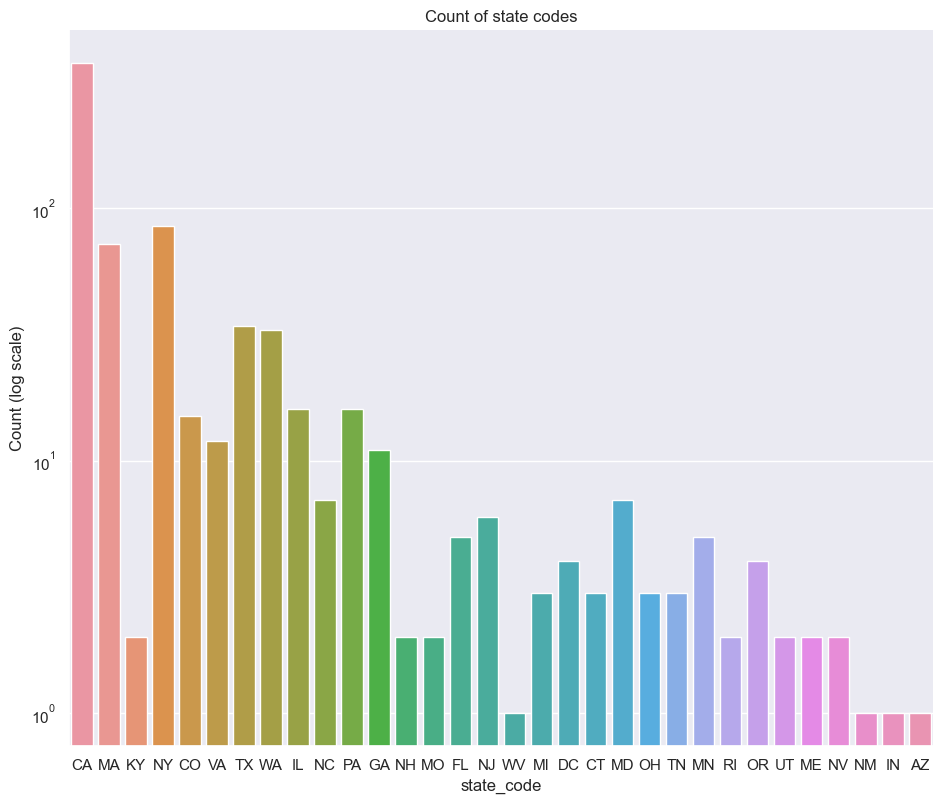

In [9]:
sb.catplot(x='state_code', kind='count', data=data_frame, height=8, aspect=1.2)
plt.yscale('log')  # printing in LOGARITHMIC SCALE
plt.ylabel('Count (log scale)')
plt.title('Count of state codes')

In [10]:
data_frame['state_code_codes'] = data_frame['state_code'].map({state: i for i, state in enumerate(data_frame['state_code'].unique())})
print_stats(data_frame['state_code_codes'])

# 0 in the MODE means CA, 1 means MA and etc.

mean = 3.4525745257452574
skew = 2.3270934893679924
median = 0.0
std = 5.8660812505448074
mode = 0


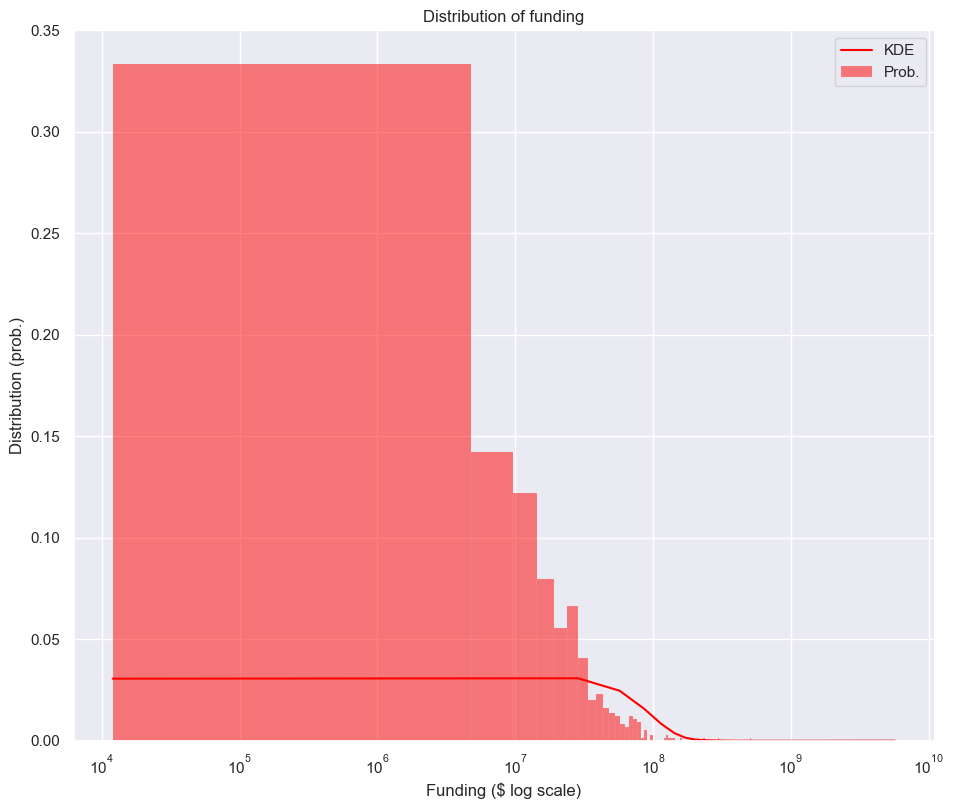

In [11]:
sb.displot(x='total_funding', kde=True,data=data_frame, height=8, aspect=1.2, color='red', stat="probability")
plt.xscale('log')  # printing in LOGARITHMIC SCALE
plt.xlabel('Funding ($ log scale)')
plt.ylabel('Distribution (prob.)')
plt.title('Distribution of funding')
plt.legend(["KDE", "Prob."])

In [12]:
print_stats(data_frame['total_funding'])

mean = 27381800.120596208
skew = 26.187512350847182
median = 10000000.0
std = 211732206.69525778
mode = 5000000


Text(0.5, 1.0, 'Count of connections')

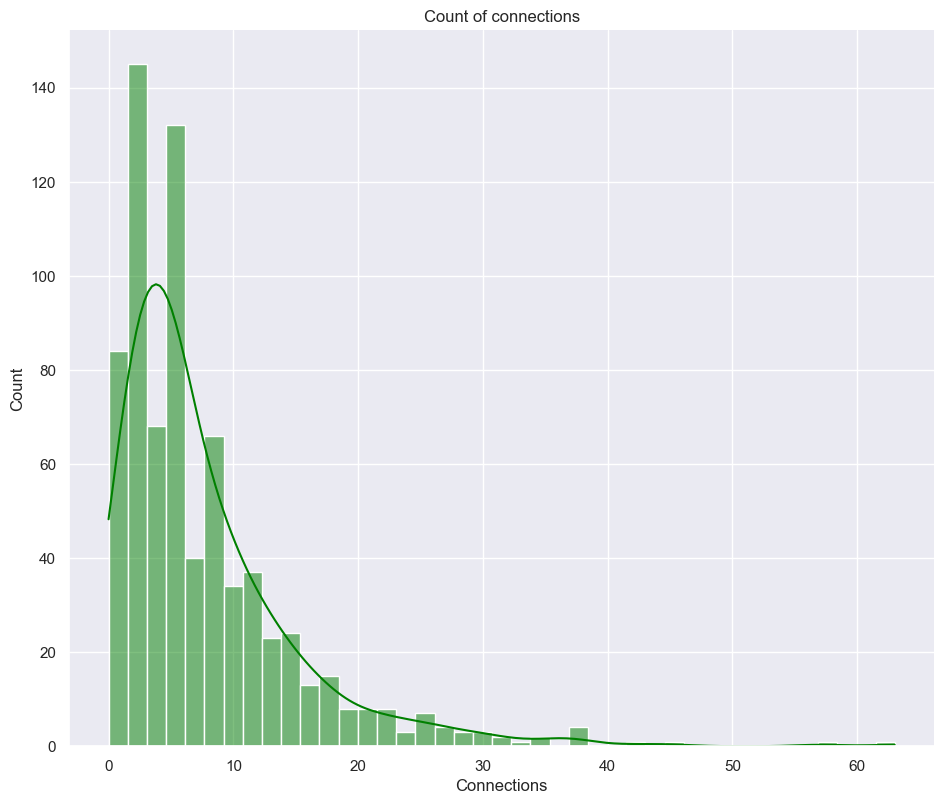

In [13]:
sb.displot(x='connections', kind='hist', kde=True, data=data_frame, height=8, aspect=1.2, color='green')
plt.xlabel('Connections')
plt.ylabel('Count')
plt.title('Count of connections')

Text(0.5, 1.0, 'Count of target thingy')

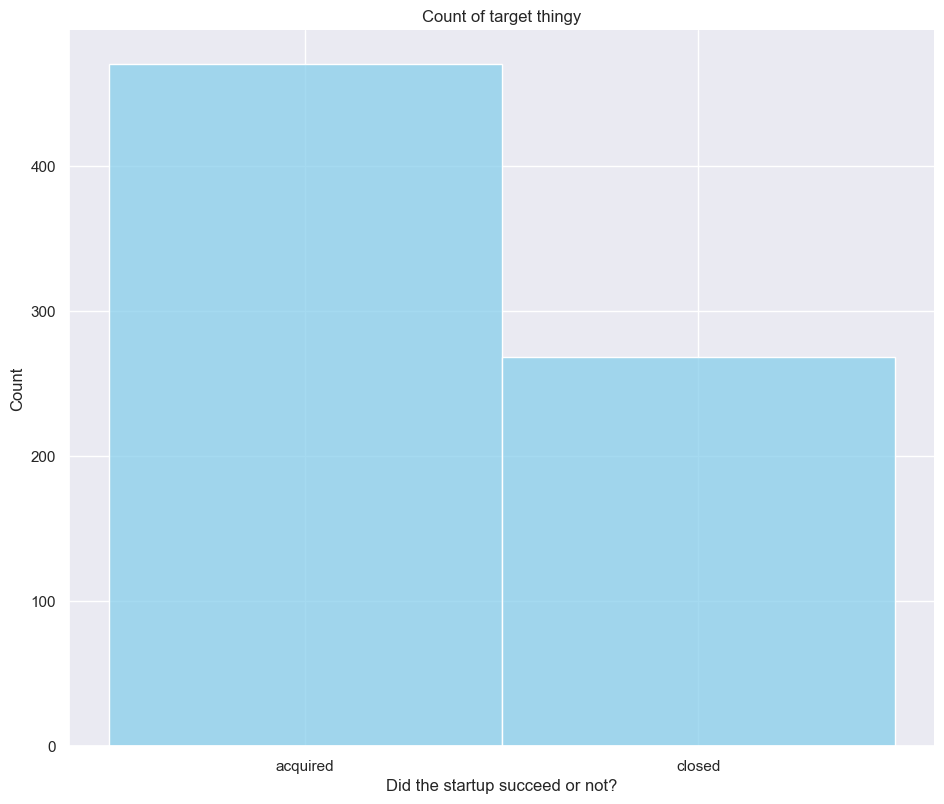

In [14]:
sb.displot(x='Target', kind='hist', data=data_frame, height=8, aspect=1.2, color='skyblue')
plt.xlabel('Did the startup succeed or not?')
plt.ylabel('Count')
plt.title('Count of target thingy')

### Coding the "Target" column to bytes

In [15]:
data_frame['target_codes'] = data_frame["Target"].map({'acquired': 1, 'closed': 0})
print_stats(data_frame["target_codes"])

# 1 in the MEAN means ACQUIRED

mean = 0.6368563685636857
skew = -0.5703207252379181
median = 1.0
std = 0.4812318921509238
mode = 1


### Correlations

In [16]:
df_correlations = data_frame.corr(numeric_only=True)
df_correlations

,latitude,longitude,first_funding_age,last_funding_age,first_milestone_age,last_milestone_age,connections,funding_rounds,total_funding,milestones,...,is_consulting,is_othercategory,roundA,roundB,roundC,roundD,avg_group_size,in_Top500,state_code_codes,target_codes
latitude,1.000000,0.362387,-0.057213,-0.061956,-0.076824,-0.062787,-0.050513,-0.006982,-0.085235,0.002742,...,-0.008433,-0.046363,-0.035337,-0.025101,-0.066926,-0.045475,-0.020249,0.048904,0.206245,0.037893
longitude,0.362387,1.000000,-0.002254,-0.005137,-0.053508,-0.085123,-0.073691,0.015995,0.020158,-0.008864,...,0.019537,-0.042443,-0.064639,-0.082009,-0.061214,-0.064926,-0.035647,-0.094226,0.405969,-0.022468
first_funding_age,-0.057213,-0.002254,1.000000,0.766039,0.594749,0.483144,-0.183358,-0.160621,0.046359,-0.280827,...,0.004868,0.089775,-0.281353,-0.044321,0.026658,0.100231,0.118929,0.050020,0.039446,-0.059797
last_funding_age,-0.061956,-0.005137,0.766039,1.000000,0.688097,0.637672,0.077883,0.373669,0.116076,-0.097969,...,0.033219,0.057309,-0.104159,0.275057,0.300999,0.316371,0.140070,0.191046,-0.020978,0.076505
first_milestone_age,-0.076824,-0.053508,0.594749,0.688097,1.000000,0.779016,0.255279,0.181870,0.062544,-0.030350,...,0.069929,0.020669,0.014750,0.210068,0.198835,0.258259,0.063160,0.167591,-0.048946,0.175999
last_milestone_age,-0.062787,-0.085123,0.483144,0.637672,0.779016,1.000000,0.366169,0.250927,0.094482,0.358309,...,0.051741,-0.015349,0.095117,0.278399,0.273729,0.256766,0.092565,0.211758,-0.077549,0.285837
connections,-0.050513,-0.073691,-0.183358,0.077883,0.255279,0.366169,1.000000,0.361143,0.096143,0.528465,...,0.131509,-0.079162,0.313651,0.296837,0.261875,0.233105,0.110219,0.230391,-0.137671,0.354304
funding_rounds,-0.006982,0.015995,-0.160621,0.373669,0.181870,0.250927,0.361143,1.000000,0.114936,0.247676,...,0.007193,-0.036626,0.241887,0.456517,0.431580,0.350841,0.057083,0.255254,-0.081839,0.190803
total_funding,-0.085235,0.020158,0.046359,0.116076,0.062544,0.094482,0.096143,0.114936,1.000000,0.014881,...,-0.002003,-0.017400,-0.029167,0.011717,0.035971,0.039217,0.050530,0.047372,0.019727,0.040964
milestones,0.002742,-0.008864,-0.280827,-0.097969,-0.030350,0.358309,0.528465,0.247676,0.014881,1.000000,...,0.045241,-0.135240,0.326341,0.204771,0.092869,0.033402,0.039267,0.180523,-0.150524,0.335855


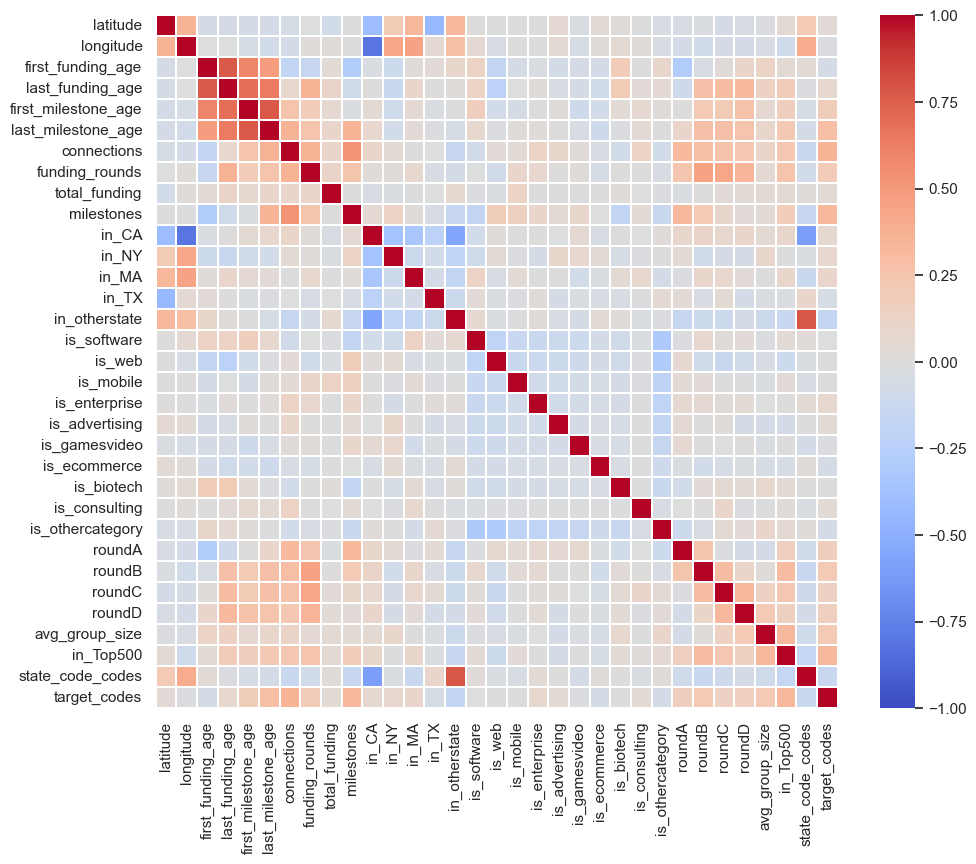

In [17]:
f, ax = plt.subplots(figsize=(11, 9))
ax = sb.heatmap(df_correlations, annot=False, vmin=-1, vmax=1, center=0, cmap='coolwarm', linewidths=0.01, linecolor='white')

### Relationships 

In [18]:
data_frame.loc[data_frame['in_CA'] == 1, 'country'] = 'CA'
data_frame.loc[data_frame['in_NY'] == 1, 'country'] = 'NY'
data_frame.loc[data_frame['in_MA'] == 1, 'country'] = 'MA'
data_frame.loc[data_frame['in_TX'] == 1, 'country'] = 'TX'
data_frame.loc[data_frame['in_otherstate'] == 1, 'country'] = 'other-state'

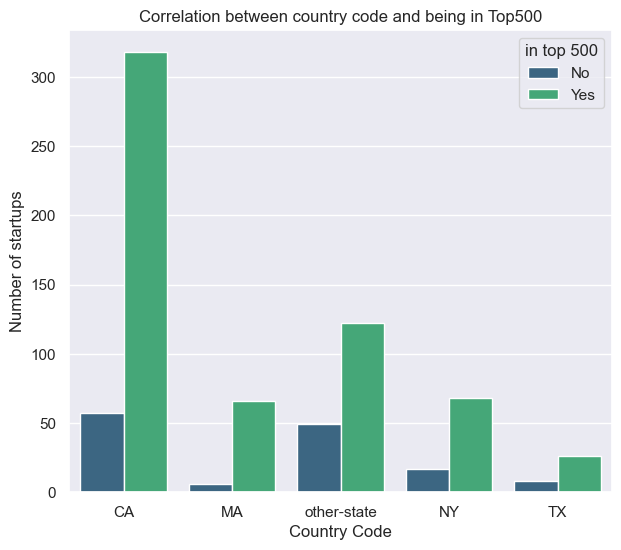

In [19]:
plt.figure(figsize=(7, 6))
sb.countplot(x='country', hue='in_Top500', data=data_frame, palette='viridis')
plt.title('Correlation between country code and being in Top500')
plt.xlabel('Country Code')
plt.ylabel('Number of startups')
plt.legend(title='in top 500', labels=['No', 'Yes'])
plt.show()

We can see from this histogram that startups in CA has more potential to be in the top 500 than other states.

In [20]:
data_frame.loc[data_frame['in_Top500'] == 1, 'in_Top500_str'] = 'Yes'
data_frame.loc[data_frame['in_Top500'] == 0, 'in_Top500_str'] = 'No'

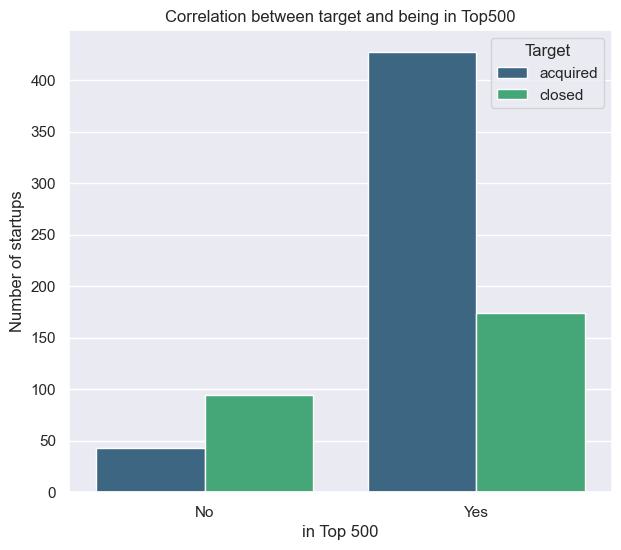

In [21]:
plt.figure(figsize=(7, 6))
sb.countplot(x='in_Top500_str', hue='Target', data=data_frame, palette='viridis')
plt.title('Correlation between target and being in Top500')
plt.xlabel('in Top 500')
plt.ylabel('Number of startups')
# plt.legend(title='Target', labels=['No', 'Yes'])
plt.show()

We can see the relationship between the success of the startup and being in the top 500 - when the startup in the top 500 it has more probability to succeed, and in the other hand, when it didn't get to the top 500 it has more probability to fail.

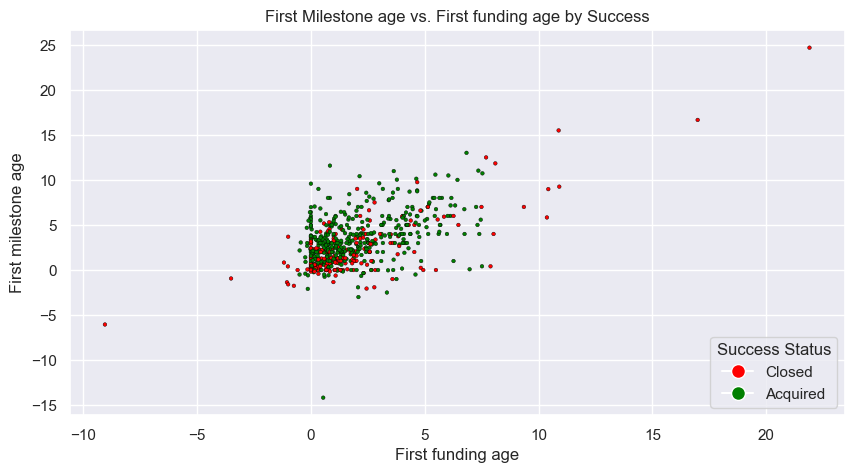

In [22]:
colordict = {'closed': 'red', 'acquired': 'green'}
plt.figure(figsize=(10, 5))
scatter = plt.scatter(data_frame['first_funding_age'], data_frame['first_milestone_age'], s=7, c=data_frame['Target'].map(colordict),  edgecolors='black', linewidths=0.3)
plt.title('First Milestone age vs. First funding age by Success')
plt.xlabel('First funding age')
plt.ylabel('First milestone age')
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='Closed',
                              markerfacecolor='red', markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='Acquired',
                              markerfacecolor='green', markersize=10)]

plt.legend(handles=legend_elements, title='Success Status', loc='lower right')
plt.show()

We can see that the first milestone usually happens close to the first funding. We can also see that company that has older first milestone age tends to not succeed.

### Data cleaning

##### Missing values

In [23]:
data_frame[data_frame.isnull().sum(axis='columns')>0]

,id,state_code,latitude,longitude,zip_code,city,name,foundation_date,first_funding_date,last_funding_date,...,roundB,roundC,roundD,avg_group_size,in_Top500,Target,state_code_codes,target_codes,country,in_Top500_str
12,c:30290,KY,38.241467,-85.724511,40204,Louisville,Resonant Vibes,01/01/2004,11/25/2008,11/25/2008,...,0,0,0,1.0000,0,closed,2,0,other-state,No
15,c:54177,VA,38.901301,-77.265158,22182,Vienna,Invicta Networks,01/01/1999,08/09/2005,08/09/2005,...,0,0,0,1.0000,0,closed,5,0,other-state,No
24,c:458,CO,40.010492,-105.276843,80302,Boulder,EventVue,05/01/2007,08/01/2007,09/01/2007,...,0,0,0,4.5000,1,closed,4,0,other-state,Yes
32,c:27741,NC,36.002893,-78.904075,27701,Durham,eMinor,10/01/2006,08/01/2006,10/07/2008,...,1,0,0,2.5000,1,closed,9,0,other-state,Yes
34,c:34338,PA,40.441694,-79.990086,15219,Pittsburgh,Zipano,06/01/2009,07/01/2009,07/01/2009,...,0,0,0,1.0000,0,closed,10,0,other-state,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728,c:25737,CA,37.502169,-122.217727,94063,Redwood City,Pearl Therapeutics,01/01/2006,07/03/2008,04/01/2013,...,0,1,1,3.6667,1,acquired,0,1,CA,Yes
731,c:15458,NY,41.019264,-73.683462,10573,Rye Brook,eBillme,10/01/2004,9/20/2006,09/01/2008,...,0,0,0,3.0000,1,closed,3,0,NY,Yes
732,c:1590,WA,47.676378,-122.122155,98052,Redmond,Smilebox,8/28/2000,02/01/2006,2/23/2010,...,1,0,0,3.0000,1,acquired,7,1,other-state,Yes
733,c:5988,CA,37.536402,-122.325129,94403,San Mateo,B-hive Networks,01/01/2005,8/25/2006,8/25/2006,...,0,0,0,2.0000,1,acquired,0,1,CA,Yes


### Spring cleaning!

let's check which columns are dirty...

In [24]:
def check_cleanness() -> None:
    are_all_good = True
    for title in data_frame.columns:
        if data_frame[title].isnull().sum() > 0:
            are_all_good = False
            print(f"titles {title} is {choice('dirty.smells.cheesy.ugly.stinky.boring'.split('.'))}")
    if are_all_good:
        print("Cleaning is done. All good!")

check_cleanness()

titles first_milestone_age is dirty
titles last_milestone_age is cheesy
titles country is ugly


In [25]:
missing_country_df = data_frame[data_frame['country'].isnull()]
missing_country_index = missing_country_df.index[0]  # its index
missing_country_df

,id,state_code,latitude,longitude,zip_code,city,name,foundation_date,first_funding_date,last_funding_date,...,roundB,roundC,roundD,avg_group_size,in_Top500,Target,state_code_codes,target_codes,country,in_Top500_str
515,c:856,CA,37.451124,-122.166264,94025,Menlo Park,Cuil,01/01/2005,03/01/2007,4/15/2008,...,1,0,0,2.5,1,closed,0,0,NaN,Yes


looks like CA is the correct country! we'll fix it:

In [26]:
# fixing...
data_frame.loc[missing_country_index, 'in_CA'] = 1
data_frame.loc[missing_country_index, 'country'] = 'CA'

# print a couple of lines
data_frame[missing_country_index:].head()


,id,state_code,latitude,longitude,zip_code,city,name,foundation_date,first_funding_date,last_funding_date,...,roundB,roundC,roundD,avg_group_size,in_Top500,Target,state_code_codes,target_codes,country,in_Top500_str
515,c:856,CA,37.451124,-122.166264,94025,Menlo Park,Cuil,01/01/2005,03/01/2007,4/15/2008,...,1,0,0,2.5000,1,closed,0,0,CA,Yes
516,c:16276,CA,37.430025,-122.099980,94043,Mountain View,Sensory Networks,01/01/2003,10/10/2005,01/01/2008,...,0,1,0,5.0000,1,acquired,0,1,CA,Yes
517,c:410,CA,37.491356,-122.228843,94025,Menlo Park,Flock,01/01/2005,01/01/2005,5/21/2008,...,1,1,1,2.0000,1,acquired,0,1,CA,Yes
518,c:726,CA,37.563585,-122.324621,94043,Mountain View,AdMob,12/01/2006,09/01/2006,1/29/2009,...,1,1,0,2.5000,1,acquired,0,1,CA,Yes
519,c:8573,IL,41.879535,-87.624333,60654,Chicago,FeeFighters,01/01/2009,05/01/2010,01/12/2011,...,0,0,0,2.6667,1,acquired,8,1,other-state,Yes


In [27]:
# let's check again
check_cleanness()

titles first_milestone_age is boring
titles last_milestone_age is stinky


We saw that there is a """"linear"""" relation between the first funding age first milestone age - therefore we can fill the nulls in first milestone age according to that relation. We do the same for last funding age and last milestone age.

In [28]:
def linear_regression(x, y):
    model = LinearRegression().fit(x, y)
    return model.coef_, model.intercept_

def predict_linear_regression(x, coef, intercept):
    return coef * x + intercept

In [29]:
def predict_null_using_linear_regression(x_label, y_label):
    # get the non-null values for linear regression to predict the null values
    value_indices = data_frame[x_label].notnull() & data_frame[y_label].notnull()
    
    x = data_frame.loc[value_indices, x_label].values.reshape(-1, 1)
    y = data_frame.loc[value_indices, y_label].values.reshape(-1, 1)

    
    # linear regression
    coef, intercept = linear_regression(x, y)

    # predict the null values
    null_indices = data_frame[x_label].isnull() | data_frame[y_label].isnull()
    for index in data_frame[null_indices].index:
        data_frame.loc[index, y_label] = predict_linear_regression(data_frame.loc[index, x_label], coef, intercept)[0]

In [30]:
predict_null_using_linear_regression('first_funding_age', 'first_milestone_age')  # fill the null values of first_milestone_age
predict_null_using_linear_regression('last_funding_age', 'last_milestone_age')  # fill the null values of last_milestone_age

# check again
check_cleanness()

Cleaning is done. All good!


#### Inconsistent values

First we can check if the state_code is consistent with the in_(state_code) values in the data_frame, changing the in_(state_code) according to the state_code.

In [60]:
def check_binary_inconsistency(columns, label):
    association_word = columns[0][:2]
    for index in data_frame[label].index:

        # x = data_frame.loc[index, columns].values#.sum()# == 1
        # x = next((col for (col, val) in zip(columns, x) if val==1)).strip("in_")
        category_code = data_frame.loc[index, label]
        good_code = f"{association_word}_{category_code}" if f"{association_word}_{category_code}" in columns else columns[-1]
        if data_frame.loc[index, columns].values.sum() == 1:
            if data_frame.loc[index, good_code] == 1:
                continue
            else:
                print("wrong values")
                right_value = ["0"]*len(columns)
                right_value[columns.index(good_code)] = '1'
                data_frame.loc[index, columns] = right_value

In [49]:
columns = "in_CA	in_NY	in_MA	in_TX	in_otherstate".split('\t')
check_binary_inconsistency(columns, "state_code")

Secondly, we can check if the category is consistent with the is_(category) values in the data_frame, changing the is_(category) according to the category.

In [59]:
columns = "is_software	is_web	is_mobile	is_enterprise	is_advertising	is_gamesvideo	is_ecommerce	is_biotech	is_consulting	is_othercategory".split('\t')
check_binary_inconsistency(columns, "category")

we need to everything
do also for of 

earth map for long-lat
sum of rounds